Перші кілька рядків датасету:
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  

Дані містять пропущені значення. Виконується обробка...

Кореляція між змінними:
              is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.134720    -0.373624     -0.487177   -0.783032   
diagonal        0.134720  1.000000     0.018265     -0.019428   -0.111534   
height_left    -0.373624  0.018265     1.000000      0.235132    0.302643   
height_right   -0.487177 -0.019428     0.2351

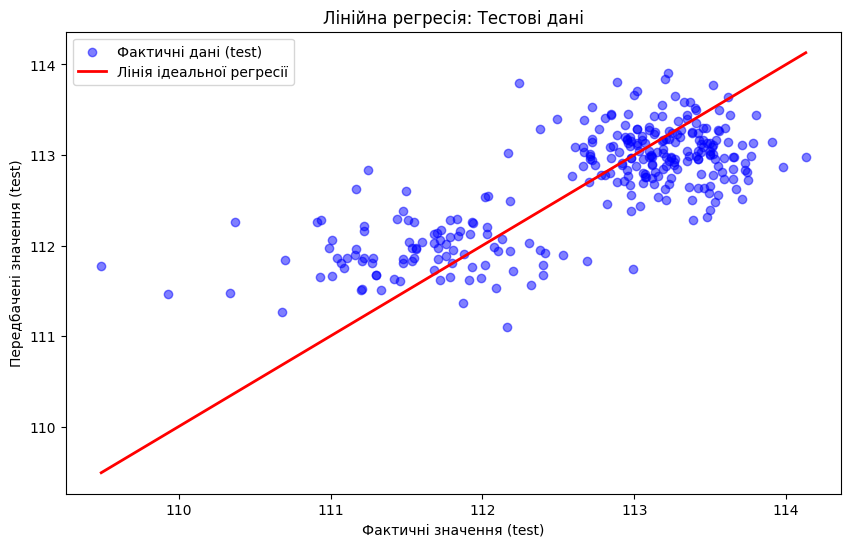

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Завантаження даних із файлу
dataset_path = "data set fake bills/fake_bills.csv"  # Файл у тій самій директорії, що й програма
df = pd.read_csv(dataset_path, delimiter=';')  # Оскільки дані розділені крапкою з комою

# Виведення кількох перших рядків для перевірки
print("Перші кілька рядків датасету:")
print(df.head())

# Перевірка наявності пропусків
if df.isnull().sum().any():
    print("\nДані містять пропущені значення. Виконується обробка...")
    df = df.dropna()  # Видалення рядків із пропусками

# Перевірка кореляцій між змінними
print("\nКореляція між змінними:")
print(df.corr())

# Розділення на незалежні змінні (X) і залежну змінну (y)
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up']]  # Вибір незалежних змінних
y = df['length']  # Залежна змінна

# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення і навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Передбачення для тестових даних
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Оцінка моделі
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nОцінка моделі на тренувальних даних:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"R²: {r2_train}")

print("\nОцінка моделі на тестових даних:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"R²: {r2_test}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))

# Графік для тестових даних
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5, label="Фактичні дані (test)")  # фактичні дані
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Лінія ідеальної регресії")  # лінія ідеальної регресії
plt.xlabel("Фактичні значення (test)")
plt.ylabel("Передбачені значення (test)")
plt.title("Лінійна регресія: Тестові дані")
plt.legend()
plt.show()
